# Lab 2 - DFT

## Question 1. Fourier Transform of Gaussian Functions 

The gaussian function will be defined as: 

$$ g(t) = \frac{e^{{-\frac{t}{t_H}}^2}}{\sqrt{\pi}t_h} $$

Plots for $t_H = 10$ and $t_H = 20$ are shown below.

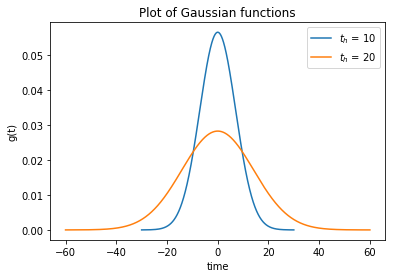

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def g(t, t_h):
    return 1/(np.sqrt(np.pi)*t_h)*np.exp(-(t/t_h)**2)

def G(omega, t_h):
    return np.exp(-(omega)**2*t_h**2*(1/4))

t = 800
dt = 10**(-3)

t_h1 = 10
t_h2 = 20

t_arr1 = np.arange(-3*t_h1,3*t_h1,dt)
t_arr2 = np.arange(-3*t_h2,3*t_h2,dt)

plt.plot(t_arr1, np.abs(g(t_arr1,t_h1)), label = '$t_h$ = 10')
plt.plot(t_arr2, np.abs(g(t_arr2,t_h2)), label = '$t_h$ = 20')
plt.legend()
plt.xlabel('time')
plt.ylabel('g(t)')
plt.title('Plot of Gaussian functions')
plt.show()

When we compute the DFT for both samples g(t) time series, we obtain the plot below. The analytic formula for the Fourier transform of g(t) is: 

$$ G(\omega) = e^{-\frac{\omega^2 t_H^2}{4}} $$

The plots for $G(\omega)$ are shown below for each $t_H$ value. 

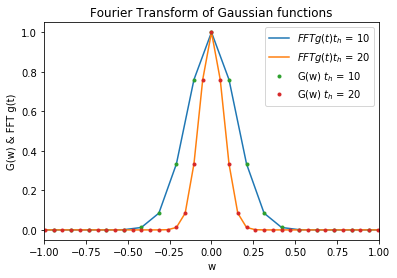

In [16]:
fft_y1= np.fft.fftshift(np.fft.fft(np.fft.fftshift(g(t_arr1,t_h1))))*dt
fft_y2= np.fft.fftshift(np.fft.fft(np.fft.fftshift(g(t_arr2,t_h2))))*dt

f_axis1 = np.fft.fftshift(np.fft.fftfreq(len(g(t_arr1,t_h1)), dt)) 
f_axis2 = np.fft.fftshift(np.fft.fftfreq(len(g(t_arr2,t_h2)), dt))

w_axis1 = f_axis1 *2*np.pi
w_axis2 = f_axis2 *2*np.pi

plt.plot(w_axis1, fft_y1, label = '$FFT g(t) t_h$ = 10')
plt.plot(w_axis2, fft_y2, label = '$FFT g(t) t_h$ = 20')

plt.plot(w_axis1, G(w_axis1,t_h1),'.', label = 'G(w) $t_h$ = 10')
plt.plot(w_axis2, G(w_axis2,t_h2),'.', label = 'G(w) $t_h$ = 20')

plt.legend()
plt.xlabel('w')
plt.ylabel('G(w) & FFT g(t)')
plt.title('Fourier Transform of Gaussian functions')
plt.xlim(-1,1)
plt.show()

The effect of filtering a general input time function f (t) by g(t) (i.e. convolution of f (t) with g(t)) would result in each f(t) value being set to a new value that is essentially the weighted average of the values in its neighborhood. The difference in filtered output after applying Gaussian functions with tH = 10 or 20 secs is that the tH values change the standard deviation of the gaussian. A greater standard deviation, means a weighted average that includes more neighbors and is blends in more with the surrounding values. 

The time-frequency uncertainty principle (a signal cannot be infinitesimally sharp both in time and frequency) in the fast fourier transforms of g(t). When tH= 10 we saw a samller standard deviation in t than tH=20, however, this was completely reversed when the fourier transform was taken and frequency values were obtained. The standard deviation was greater in the fast fourier transform for tH= 10.  

## Question 2: Fourier transform of Window Functions

A continuous time signal f(t) can be truncated into a signal of finite length, T, by window functions b(t):

$$g(t) = f(t)b(t)$$

The following window functions are plotted below: 

- Boxcar function: $$ b(t) = \left\{\begin{array}{1} 1  & 0 \leq t \leq T \\ 0 & else \end{array}\right. $$
- Hann window: $$ b(t) = \left\{\begin{array}{1} \frac{1}{2}(1-\cos(\frac{2 \pi t}{T})  & 0 \leq t \leq T \\ 0 & else \end{array}\right. $$

with T = 10 seconds and $\Delta$ t = 0.01 seconds


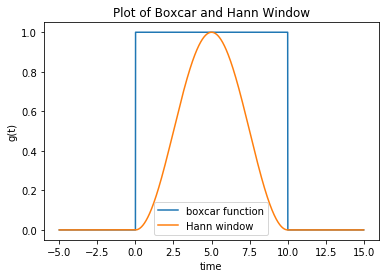

In [17]:
def box(t, T):
    y = np.zeros(len(t))
    count=0
    for num in t:
        if num >= 0 and num <= T:
            y[count]= 1
        else:
            y[count]= 0
        count += 1
    return y
    
def hann(t, T):
    y = np.zeros(len(t))
    count=0
    for num in t:
        if num>=0 and num<=T:
            y[count] = 1/2 *(1-np.cos(2*np.pi*num/T))
        else:
            y[count] = 0 
        count += 1
    return y
    
T= 10 
dt= 0.01

x= np.arange(-5,15,dt)

plt.plot(x,box(x, T), label = "boxcar function")
plt.plot(x,hann(x, T), label = "Hann window")
plt.xlabel('time')
plt.ylabel('g(t)')
plt.legend()
plt.title("Plot of Boxcar and Hann Window")
plt.show()

The Fourier transform of both functions are plotted below using fft().  

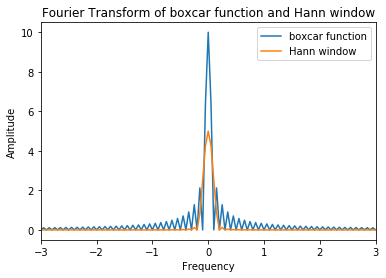

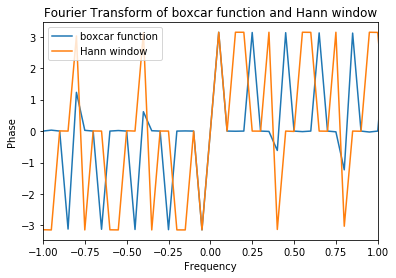

In [35]:
fft_y1= np.fft.fftshift(np.fft.fft(np.abs(box(x, T))))*dt 
fft_y2= np.fft.fftshift(np.fft.fft(np.abs(hann(x, T))))*dt

f_axis1 = np.fft.fftshift(np.fft.fftfreq(len(box(x, T)), dt)) 
f_axis2 = np.fft.fftshift(np.fft.fftfreq(len(hann(x, T)), dt))

plt.plot(f_axis1,np.abs(fft_y1), label = "boxcar function")
plt.plot(f_axis2,np.abs(fft_y2), label = "Hann window")
plt.xlim(-3,3)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of boxcar function and Hann window')
plt.legend()
plt.show()

plt.plot(f_axis1,np.angle(fft_y1), label = "boxcar function")
plt.plot(f_axis2,np.angle(fft_y2), label = "Hann window")
plt.xlim(-1,1)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Fourier Transform of boxcar function and Hann window')
plt.legend()
plt.show()

Based on the FTs, there appears to be different effects of truncating a continuous time series by either window on its frequency spectrum G(w) compared to the original spectrum F(w). The Hann window appears to be better at being able to filter out noise. So if a signal is expected to have a lot of noise but not many different frequencies, the Hann window is better suited. However if a signal is known to be composed of many different frequencies, the boxcar function will more likely to pick up on it.   

Therefore the advantages of using the boxcar function for truncation is that it has better resolution to pick up the different frequencies in a signal, however a disadvantage would be that this also means it will more likely be more affected by noise that may be in the signal. The Hann window does not have as good of a resolution and will get rid of other frequencies of lower amplitude. 

## Question 3: Radial Distribution Function 

The Radial Distribution Function is modelled as: 

$$ g(r) = 1 + \frac{1}{2\pi^2 \rho r}\int_{0}^{\infty} k(S(k)-1)\sin(kr)dk $$

where k = wavenumber, and S(k) is an even function called the structure factor. We can substitute $ sin(kr) = \frac{e^{ikr}-e^{-ikr}}{2i} $. Given that the integral bounds are from 0 to positive infinity, $ sin(kr) = \frac{e^{ikr}}{2i} $. Therefore the integral can be rewitten as: 

$$ p(r) = \int_{-\infty}^{\infty} \frac{1}{2i}k(S(k)-1)e^{ikr}dk $$

The Fourier transform, P(k), of p(r) is :

$$ P(k) = -i\pi k(S(k)-1) $$

The Fourier transform P(k) is then an imaginary function. Since S(k) is an even function,then P(k) is odd. 

A plot of P(k) is shown below:

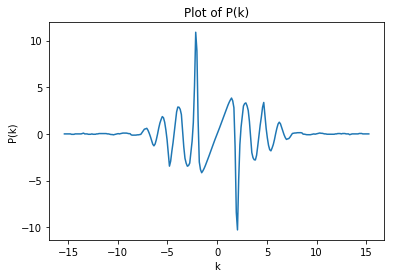

In [19]:
YanData = np.array([
    0.161000, 0.138000, 0.120000, 0.105000, 0.088000, 0.086000, 0.087000, 0.088000,
    0.090000, 0.094000, 0.105000, 0.125000, 0.152000, 0.277000, 0.468000, 1.248000,
    2.391000, 2.604000, 1.725000, 1.160000, 0.904000, 0.761000, 0.640000, 0.626000,
    0.633000, 0.680000, 0.744000, 0.869000, 1.038000, 1.183000, 1.225000, 1.237000,
    1.231000, 1.184000, 1.099000, 1.011000, 0.932000, 0.870000, 0.801000, 0.771000,
    0.871000, 0.961000, 1.026000, 1.075000, 1.102000, 1.107000, 1.087000, 1.064000,
    1.033000, 0.998000, 0.968000, 0.945000, 0.936000, 0.946000, 0.966000, 0.987000,
    1.004000, 1.018000, 1.027000, 1.024000, 1.022000, 1.015000, 1.006000, 0.998000,
    0.997000, 0.996000, 0.996000, 0.995000, 0.995000, 0.995000, 0.995000, 0.996000,
    1.001000, 1.001000, 1.002000, 1.003000, 1.003000, 1.003000, 1.003000, 1.002000,
    1.001000, 1.000000, 1.001000, 1.000000, 0.999000, 0.998000, 0.997000, 0.998000,
    0.998000, 0.999000, 1.000000, 1.000000, 1.001000, 1.001000, 1.001000, 1.001000,
    1.001000, 1.001000, 1.001000, 1.000000, 1.000000, 0.999000, 0.999000, 0.999000,
    1.000000, 0.999000, 0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.002000,
    1.001000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999000,
    0.999000, 0.999000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000
])
dk = 0.12                 # inverse Angstroms
massRho = 1.4273          # grams/cc 
molWeight = 39.948        # grams/mol
Navogadro = 6.0221367e23  # atoms/mol

S=YanData
k_pos = np.arange(0, len(S)*dk, dk)
k_neg = np.arange(-len(S)*dk,0, dk)
k= np.append(k_neg[:-1],k_pos)
S_k = np.append(YanData[::-1][:-1], YanData)
N= len(S_k)
P_k = -k*(S_k-1)*np.pi*1j

plt.plot(k,P_k.imag)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Plot of P(k)')
plt.show()

C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


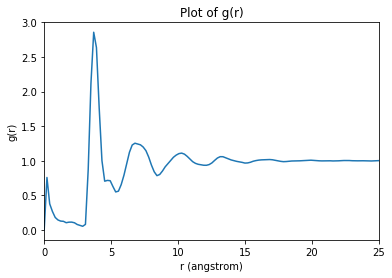

In [20]:
def RDFcalc(S, dk, rho):
    k_pos = np.arange(0, len(S)*dk, dk)
    k_neg = np.arange(-len(S)*dk,0, dk)
    k= np.append(k_neg[:-1],k_pos)
    S_k = np.append(S[::-1][:-1], S)
    N= len(S_k)
    P_k = (k*(S_k-1)*np.pi)/1j
    p_r = np.fft.ifft((np.fft.ifftshift(P_k)))*N*dk*1/(2*np.pi)
    r = np.arange(N)*2*np.pi*1/(N*dk)    
    const = 2*np.pi**2*rho  
    [gn, rn] = [1 + 1/(const*r)*p_r,r]
    [gn[0],rn[0]]=[0,0]
    return [gn, rn]
rho = massRho/molWeight*Navogadro*1e-24
[gn, rn] = RDFcalc(YanData, dk, rho)
plt.plot(rn,np.abs(gn))
plt.xlabel('r (angstrom)')
plt.ylabel('g(r)')
plt.xlim(0,25)
plt.title('Plot of g(r)') 
plt.show()

I can trust the data from about 0.5 < r < 25 as this is when the data behaves as expected. The radial distribution function appears to be at the largest peak when we are at a radius of about 4.5 angstrom, so I expect the average radius to be about this amount as well, with a deviation of about +/-0.5 angstrom as that is roughly what the standard deviation appears to be . 

C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


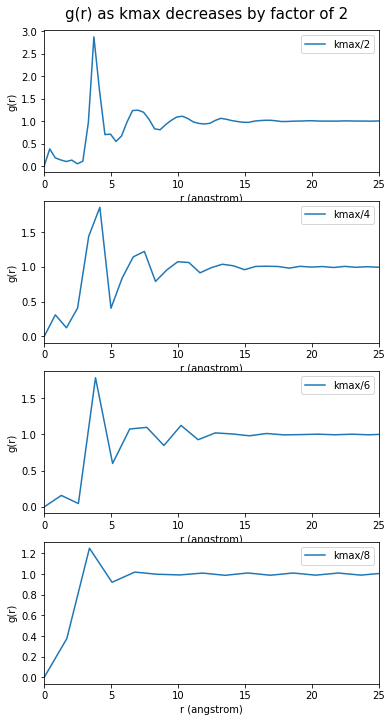

In [21]:
fig = plt.figure(figsize=(6,11))
fig.suptitle('g(r) as kmax decreases by factor of 2',fontsize=15)
fig.subplots_adjust(top=0.95)
for i in range(1,5):
    [gn, rn] = RDFcalc(YanData[:len(YanData)//(i*2)], dk, rho)
    plt.subplot(4,1,i)
    plt.plot(rn,np.abs(gn), label = 'kmax/'+ str(i*2))
    plt.legend()
    plt.xlabel('r (angstrom)')
    plt.ylabel('g(r)')
    plt.xlim(0,25)
plt.show()

As kmax decreases, we find that g(r) smoothens out and the peaks become less and less apparent. He can reduce the length by a factor of two and still make out the peaks in the plot. This happens because as we reduce the length we lose the higher frequency terms and are left with lower frequency terms that essentially just blur the ifft, since you lose some resolution. 

C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\denis\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


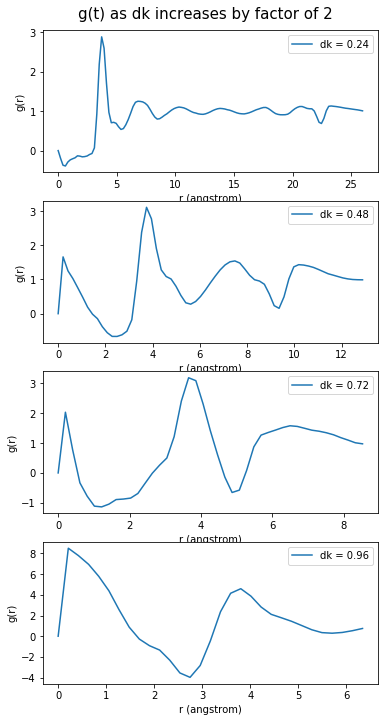

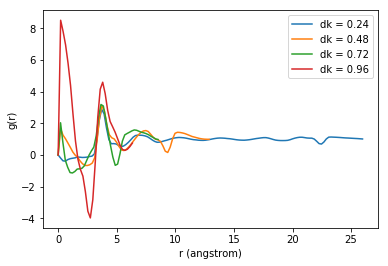

In [22]:
fig = plt.figure(figsize=(6,11))
fig.suptitle('g(t) as dk increases by factor of 2',fontsize=15)
fig.subplots_adjust(top=0.95)
for i in range(1,5):
    [gn, rn] = RDFcalc(YanData[::2*i], dk*2*i, rho)
    plt.subplot(4,1,i)
    plt.plot(rn,gn, label = 'dk = '+ str(i*dk*2))
    plt.legend()
    plt.xlabel('r (angstrom)')
    plt.ylabel('g(r)')
plt.show()
for i in range(1,5):
    [gn, rn] = RDFcalc(YanData[::2*i], dk*2*i, rho)
    #plt.subplot(4,1,i)
    plt.plot(rn,gn, label = 'dk = '+ str(i*dk*2))
    plt.legend()
    plt.xlabel('r (angstrom)')
    plt.ylabel('g(r)')
plt.show()

To still recover the first two peaks clearly, we need a dk of at least 0.75. The plot appears to get shorter as you increase dk. This, and the previous result, is a direct outcome of the Nyquist sampling theorem.